# Part I - ProsperLoan Data Exploration
## Alex Akaolisah

## Introduction
> This [dataset](https://www.kaggle.com/datasets/barun2104/telecom-churn) provided by udacity consists of 113937 rows and 81 columns of loan data.This corresponds to 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
This data [dictionary](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554486256024000) explains the variables in the data set.


## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
#Loading dataset into pandas dataframe
df1=pd.read_csv('prosperLoanData.csv')

#displaying first 5 rows
df1.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df1.shape

(113937, 81)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
#Limiting our Data size for exploration to 5 years worth of data

print("Date of First Listing:   "+ df1.ListingCreationDate.min())
print("Date of Last Listing:   "+df1.ListingCreationDate.max())


df = df1.query('ListingCreationDate >= "2009-03-11 00:00:00.000000000"')
df.head()

Date of First Listing:   2005-11-09 20:44:28.847000000
Date of Last Listing:   2014-03-10 12:20:53.760000000


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [7]:
print(df.shape)
df.info()

(84881, 81)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 84881 entries, 1 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ListingKey                           84881 non-null  object 
 1   ListingNumber                        84881 non-null  int64  
 2   ListingCreationDate                  84881 non-null  object 
 3   CreditGrade                          13 non-null     object 
 4   Term                                 84881 non-null  int64  
 5   LoanStatus                           84881 non-null  object 
 6   ClosedDate                           26033 non-null  object 
 7   BorrowerAPR                          84881 non-null  float64
 8   BorrowerRate                         84881 non-null  float64
 9   LenderYield                          84881 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null  float64
 11  EstimatedLoss  

In [8]:
#Selecting columns for analysis
list(df.columns)

['ListingKey',
 'ListingNumber',
 'ListingCreationDate',
 'CreditGrade',
 'Term',
 'LoanStatus',
 'ClosedDate',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'ListingCategory (numeric)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'EmploymentStatusDuration',
 'IsBorrowerHomeowner',
 'CurrentlyInGroup',
 'GroupKey',
 'DateCreditPulled',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'FirstRecordedCreditLine',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (p

In [9]:
prosper = df[['ListingKey', 'ListingCreationDate', 'Term', 'LoanStatus',
       'BorrowerAPR', 'BorrowerRate', 'LenderYield',
        'ProsperRating (Alpha)', 'ProsperScore',
       'ListingCategory (numeric)', 'BorrowerState', 'EmploymentStatus',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 
       'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanMonthsSinceOrigination',
       'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter',
        'MonthlyLoanPayment', 'LP_ServiceFees', 'PercentFunded']]
        

In [10]:
prosper.rename(columns={'ProsperRating (Alpha)':'Prosper_Rating', 'ListingCategory (numeric)':'Listing_Category'}, inplace = True);

C:\Users\THIS PC\AppData\Local\Temp\ipykernel_4472\1901206676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prosper.rename(columns={'ProsperRating (Alpha)':'Prosper_Rating', 'ListingCategory (numeric)':'Listing_Category'}, inplace = True);


In [11]:
prosper.describe()

,Term,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,Listing_Category,StatedMonthlyIncome,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,LP_ServiceFees,PercentFunded
count,84881.000000,84881.000000,84881.000000,84881.000000,84853.000000,84881.000000,8.488100e+04,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000
mean,42.483995,0.226647,0.196011,0.186007,5.950067,3.312626,5.930753e+03,16.035520,9081.579447,291.874869,-54.633773,0.998099
std,11.639022,0.079919,0.074634,0.074634,2.376501,4.363802,8.238744e+03,13.911568,6287.801238,186.679293,59.724957,0.020738
min,12.000000,0.045830,0.040000,0.030000,1.000000,0.000000,0.000000e+00,0.000000,1000.000000,0.000000,-589.950000,0.700000
25%,36.000000,0.163280,0.135900,0.125900,4.000000,1.000000,3.433333e+03,4.000000,4000.000000,157.330000,-72.300000,1.000000
50%,36.000000,0.219450,0.187500,0.177500,6.000000,1.000000,5.000000e+03,11.000000,7500.000000,251.840000,-34.890000,1.000000
75%,60.000000,0.292540,0.257400,0.247400,8.000000,3.000000,7.083333e+03,25.000000,13500.000000,388.330000,-14.270000,1.000000
max,60.000000,0.423950,0.360000,0.340000,11.000000,20.000000,1.750003e+06,58.000000,35000.000000,2251.510000,3.010000,1.012500


In [12]:
print(prosper.shape)
prosper.info()

(84881, 24)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 84881 entries, 1 to 113936
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ListingKey                  84881 non-null  object 
 1   ListingCreationDate         84881 non-null  object 
 2   Term                        84881 non-null  int64  
 3   LoanStatus                  84881 non-null  object 
 4   BorrowerAPR                 84881 non-null  float64
 5   BorrowerRate                84881 non-null  float64
 6   LenderYield                 84881 non-null  float64
 7   Prosper_Rating              84853 non-null  object 
 8   ProsperScore                84853 non-null  float64
 9   Listing_Category            84881 non-null  int64  
 10  BorrowerState               84881 non-null  object 
 11  EmploymentStatus            84881 non-null  object 
 12  IsBorrowerHomeowner         84881 non-null  bool   
 13  CurrentlyInGroup  

### The structure of the dataset?

- The Loaded dataset now contains 84881 rows and 23 columns carefully chosen

### Main feature(s) of interest

- The main features I am interested in is LenderYield: The factors that affect the LenderYield

### Features in the dataset I think will help support my investigation into the feature(s) of interest?

- I will be investigating the contributions of LoanOriginalAmount, BorrowerAPR, BorrowerRate, PropserRating, ProsperScore to the loan yield

## 1.   Univariate Exploration

### LenderYield
- What factors affect the yield on the loans given out?

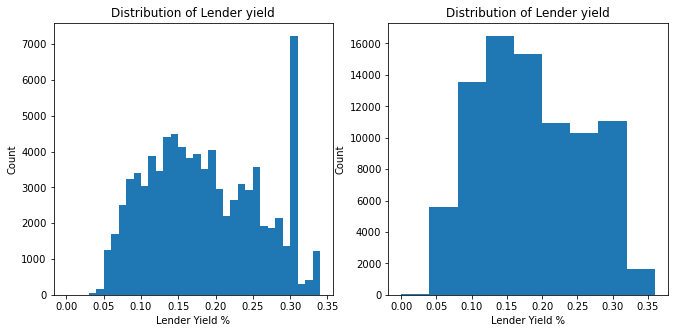

In [13]:
#Plotting the distribution of the LenderYield on different bin sizes
plt.figure(figsize=[11,5])
plt.subplot(1,2,1)
Bin_1=np.arange(0, prosper['LenderYield'].max()+0.01, 0.01)
plt.hist(data=prosper, x='LenderYield', bins=Bin_1);
plt.xlabel('Lender Yield %')
plt.ylabel('Count')
plt.title('Distribution of Lender yield');

plt.subplot(1,2,2)
Bin_2=np.arange(0, prosper['LenderYield'].max()+0.04, 0.04)
plt.hist(data=prosper, x='LenderYield', bins=Bin_2);
plt.xlabel('Lender Yield %')
plt.ylabel('Count')
plt.title('Distribution of Lender yield');

#### The return on investment on loans are fairly between 5% and 35%
- More lenders were willing to give loans at yields fairly around 15%
- As Lender yields approached 20%, Less people borrowed
- There is a notable high number of Lenders (borrowers) occuring at around 30% lender yield worth investigating
- The factors responsible for the abservation could be interest rate, year loan was borrowed, loan service fees, etc

### BorrowerRate and BorrowerAPR
- How is the loan rate and Loan APR distributed over the entire population of borrowers

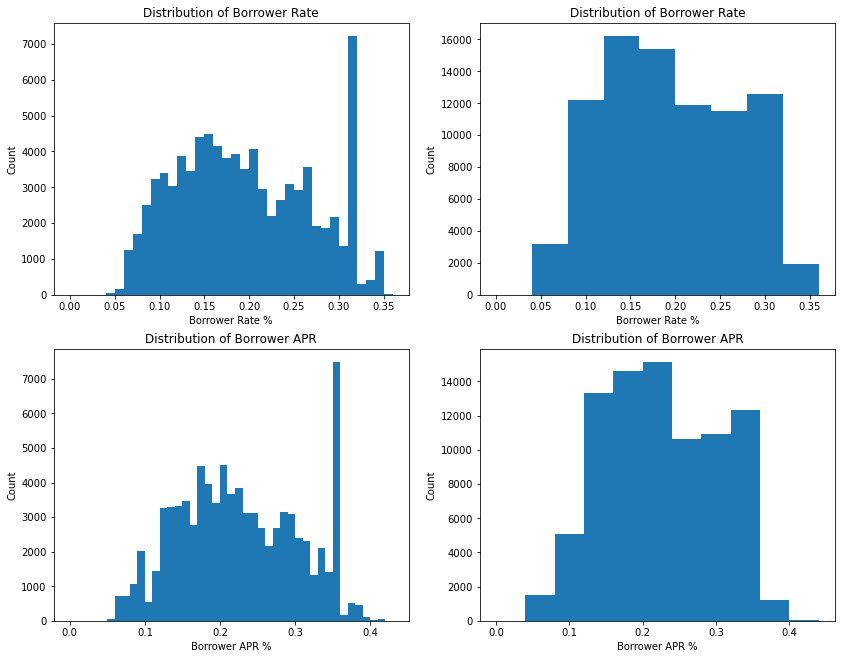

In [14]:
#Plotting the distribution of the BorrowerRate, Borrower APR on different bin sizes
plt.figure(figsize=[14,11])
plt.subplot(2,2,1)
Bin_1=np.arange(0, prosper['BorrowerRate'].max()+0.01, 0.01)
plt.hist(data=prosper, x='BorrowerRate', bins=Bin_1);
plt.xlabel('Borrower Rate %')
plt.ylabel('Count')
plt.title('Distribution of Borrower Rate');

plt.subplot(2,2,2)
Bin_2=np.arange(0, prosper['BorrowerRate'].max()+0.04, 0.04)
plt.hist(data=prosper, x='BorrowerRate', bins=Bin_2);
plt.xlabel('Borrower Rate %')
plt.ylabel('Count')
plt.title('Distribution of Borrower Rate');

plt.subplot(2,2,3)
Bin_3=np.arange(0, prosper['BorrowerAPR'].max()+0.01, 0.01)
plt.hist(data=prosper, x='BorrowerAPR', bins=Bin_3);
plt.xlabel('Borrower APR %')
plt.ylabel('Count')
plt.title('Distribution of Borrower APR');

plt.subplot(2,2,4)
Bin_4=np.arange(0, prosper['BorrowerAPR'].max()+0.04, 0.04)
plt.hist(data=prosper, x='BorrowerAPR', bins=Bin_4);
plt.xlabel('Borrower APR %')
plt.ylabel('Count')
plt.title('Distribution of Borrower APR');

- The lenderYield, BorrowerAPR and BorrowRate are simmilar in distribution. This follows from the mathematical implication that Lenderyield is a direct consequence of loan interest rate

### How prosper rated their borrowers from HR(High Risk) to AA(Excellence)?

C:\Users\THIS PC\AppData\Local\Temp\ipykernel_4472\1483674033.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prosper['Prosper_Rating'] = prosper['Prosper_Rating'].astype(prosper_ratings);


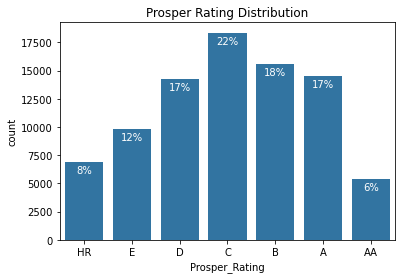

In [15]:

base_color=sb.color_palette()[0]

#Change prosper ratings to categorical ordered set
Prosper_Rating=['HR','E','D','C', 'B', 'A', 'AA']
prosper_ratings = pd.api.types.CategoricalDtype(ordered = True,categories = Prosper_Rating)
prosper['Prosper_Rating'] = prosper['Prosper_Rating'].astype(prosper_ratings);

#Plot a bar chart of the variable
sb.countplot(data=prosper,x='Prosper_Rating',color=base_color,);
plt.title('Prosper Rating Distribution');

n_prosper = prosper.shape[0]
# Count the frequency of unique values in the `ProsperRating` column 
type_counts = prosper['Prosper_Rating'].value_counts()
# add annotations
i, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for i, label in zip(i, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_prosper)

    # print the annotation just below the top of the bar
    plt.text(i,  count-1000, pct_string, ha = 'center', color = 'w');

- Most borrowers (27%) recieved average prosper rating
- Only 6% of borrowers recieved excellent rating

### Loan Original Amount
- What is the distribution of size of principal, given out on loans over the entire borrowers population?

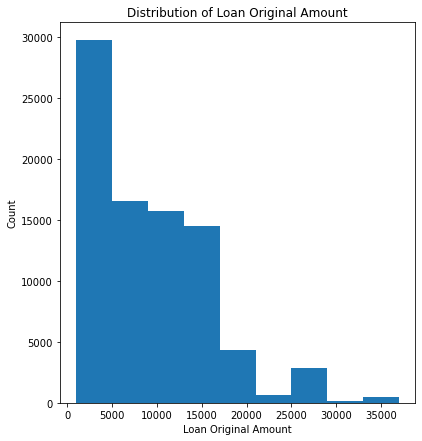

In [16]:
plt.figure(figsize=[14,7])
plt.subplot(1,2,1)
Bin_5=np.arange(1000, prosper['LoanOriginalAmount'].max()+4000, 4000)
plt.hist(data=prosper, x='LoanOriginalAmount', bins=Bin_5);
plt.xlabel('Loan Original Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Original Amount');

- There were more small to medium sized loans (loans less than $15000)
- Higher loan amounts occured only a few times

## Bivariate Exploration

1.    What is the relationship between BorrowerRate and LenderYield?

Text(0, 0.5, 'Borrower APR ')

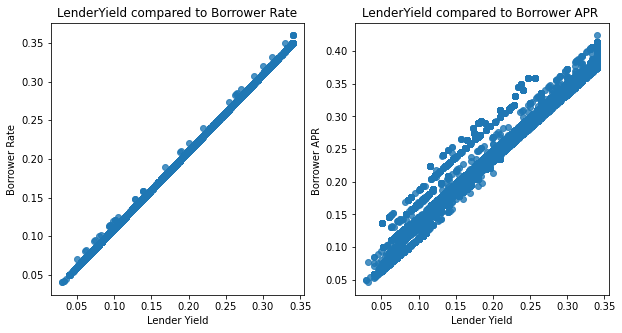

In [17]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sb.regplot(data = prosper, x = 'LenderYield', y = 'BorrowerRate', fit_reg=False);
plt.title('LenderYield compared to Borrower Rate')
plt.xlabel('Lender Yield')
plt.ylabel('Borrower Rate')

plt.subplot(1,2,2)
sb.regplot(data = prosper, x = 'LenderYield', y = 'BorrowerAPR', fit_reg=False);
plt.title('LenderYield compared to Borrower APR ')
plt.xlabel('Lender Yield')
plt.ylabel('Borrower APR ')

- There is a strong, almost perfect correlation between Lender yield and Borrower rate & APR. This confirms that the yield on the loan is primarily from interest payed on them



2. What is the relationship between Prosper Rating and Loan Original Amount

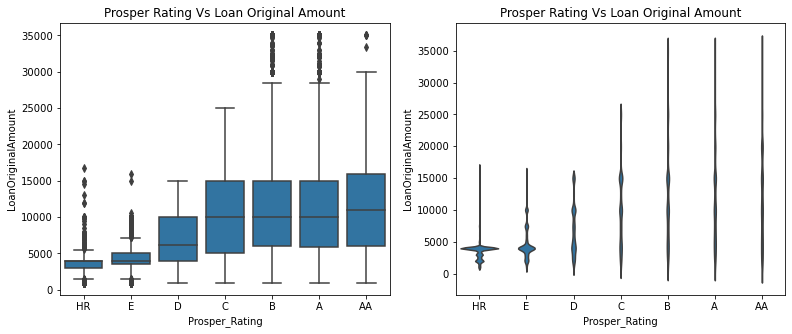

In [18]:
from statistics import quantiles

plt.figure(figsize=[13,5])
plt.subplot(1,2,1)
colors=sb.color_palette()[0]
sb.boxplot(data=prosper, x='Prosper_Rating', y='LoanOriginalAmount', color=colors,);
plt.title('Prosper Rating Vs Loan Original Amount')

plt.subplot(1,2,2)
sb.violinplot(data=prosper, x='Prosper_Rating', y='LoanOriginalAmount', color=colors, inner=None);
plt.title('Prosper Rating Vs Loan Original Amount');

- The Higher the Prosper rating, The higher the amount of loan the Borrower can borrow.
- This is a depiction of the lenders' confidence

3.    How did interest rate (hence Lender Yield) change over time and how did it affect borrowing

In [19]:
prosper1=prosper.copy()

In [69]:
import datetime

# splitting date and time from ListingCreationDate  to create a date and time column for our analysis
prosper['year'] = pd.to_datetime(prosper['ListingCreationDate'],format='%Y-%m-%d %H:%M:%S').dt.year #Creating the "year" column
prosper['creation_time'] = pd.to_datetime(prosper['ListingCreationDate']).dt.time

#Creating columns for maximun and average lender Yield, Average Borrower rate and average borrower APR for each year in order to visualise how these changed over the years
prosper['MaxLenderYield'] = prosper['LenderYield'].max();
prosper['MaxBorrowerRate'] = prosper['BorrowerRate'].max();
prosper['MaxBorrowerAPR'] = prosper['BorrowerAPR'].max();

prosper['MeanLenderYield'] = prosper['LenderYield'].mean();
prosper['MeanBorrowerRate'] = prosper['BorrowerRate'].mean();
prosper['MeanBorrowerAPR'] = prosper['BorrowerAPR'].mean();

C:\Users\THIS PC\AppData\Local\Temp\ipykernel_4472\1984672977.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prosper['year'] = pd.to_datetime(prosper['ListingCreationDate'],format='%Y-%m-%d %H:%M:%S').dt.year #Creating the "year" column
C:\Users\THIS PC\AppData\Local\Temp\ipykernel_4472\1984672977.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prosper['creation_time'] = pd.to_datetime(prosper['ListingCreationDate']).dt.time
C:\Users\THIS PC\AppData\Local\Temp\ipykernel_4472\1984672977.py:8: Settin

In [68]:
prosper.groupby(['year'])['LenderYield'].max()

year
2009    0.3400
2010    0.3400
2011    0.3204
2012    0.3204
2013    0.3065
2014    0.2959
Name: LenderYield, dtype: float64

In [48]:
prosper.head(2)


,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,Prosper_Rating,ProsperScore,Listing_Category,...,PercentFunded,creation_date,creation_time,MaxLenderYield,MaxBorrowerRate,MaxBorrowerAPR,MeanLenderYield,MeanBorrowerRate,MeanBorrowerAPR,year
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,0.0820,A,7.0,2,...,1.0,2014-02-27,08:28:07.900000,0.34,0.36,0.42395,NaN,0.196011,0.226647,2014
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,0.0874,A,9.0,16,...,1.0,2012-10-22,11:02:35.010000,0.34,0.36,0.42395,NaN,0.196011,0.226647,2012


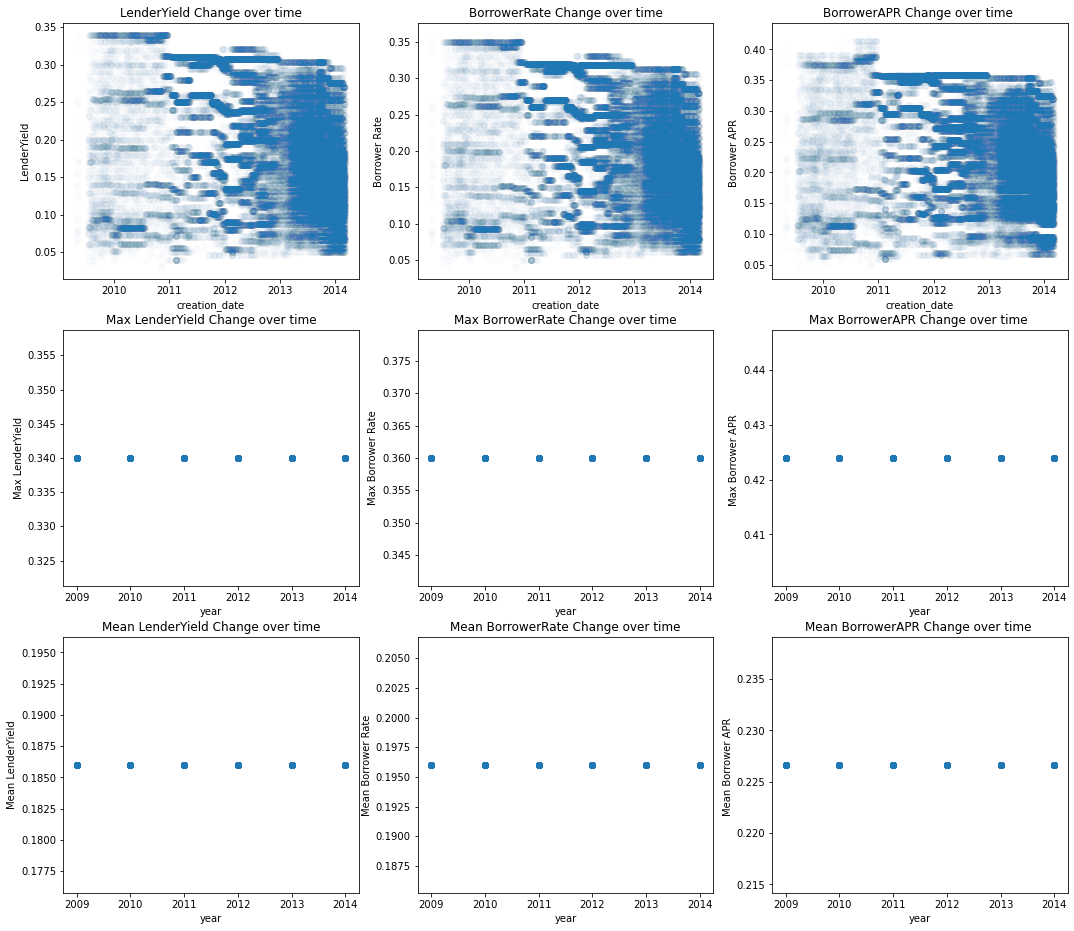

In [70]:
plt.figure(figsize=[18,16])

plt.subplot(3,3,1)
sb.regplot(data = prosper, x = 'creation_date', y = 'LenderYield', scatter_kws={'alpha':1/100}, fit_reg=False);
plt.title('LenderYield Change over time')
plt.xlabel('creation_date')
plt.ylabel('LenderYield')

plt.subplot(3,3,2)
sb.regplot(data = prosper, x = 'creation_date', y = 'BorrowerRate', scatter_kws={'alpha':1/100}, fit_reg=False);
plt.title('BorrowerRate Change over time')
plt.xlabel('creation_date')
plt.ylabel('Borrower Rate')

plt.subplot(3,3,3)
sb.regplot(data = prosper, x = 'creation_date', y = 'BorrowerAPR', scatter_kws={'alpha':1/100}, fit_reg=False);
plt.title('BorrowerAPR Change over time ')
plt.xlabel('creation_date')
plt.ylabel('Borrower APR ')

#Maximum values
plt.subplot(3,3,4)
sb.regplot(data = prosper, x = 'year', y = 'MaxLenderYield', fit_reg=False);
plt.title('Max LenderYield Change over time')
plt.xlabel('year')
plt.ylabel('Max LenderYield')

plt.subplot(3,3,5)
sb.regplot(data = prosper, x = 'year', y = 'MaxBorrowerRate', fit_reg=False);
plt.title('Max BorrowerRate Change over time')
plt.xlabel('year')
plt.ylabel('Max Borrower Rate')

plt.subplot(3,3,6)
sb.regplot(data = prosper, x = 'year', y = 'MaxBorrowerAPR', fit_reg=False);
plt.title('Max BorrowerAPR Change over time ')
plt.xlabel('year')
plt.ylabel('Max Borrower APR ')

#Mean Values
plt.subplot(3,3,7)
sb.regplot(data = prosper, x = 'year', y = 'MeanLenderYield', fit_reg=False);
plt.title('Mean LenderYield Change over time')
plt.xlabel('year')
plt.ylabel('Mean LenderYield')

plt.subplot(3,3,8)
sb.regplot(data = prosper, x = 'year', y = 'MeanBorrowerRate', fit_reg=False);
plt.title('Mean BorrowerRate Change over time')
plt.xlabel('year')
plt.ylabel('Mean Borrower Rate')

plt.subplot(3,3,9)
sb.regplot(data = prosper, x = 'year', y = 'MeanBorrowerAPR', fit_reg=False);
plt.title('Mean BorrowerAPR Change over time ')
plt.xlabel('year')
plt.ylabel('Mean Borrower APR ');

> Although we can see from the first three charts that The variables: LenderYield, BorrowerAPR and BorrowerRate changed over time each year, we can see from the rest of the charts that the average and maximum values of these variables remained constant throughout the period. Hence:
- The Average Yield of the loans given out by lenders did not decrease significantly over the years (less than 0.5% change)
- The Maximum Yield of the loans given out by lenders decreased over the years but not significantly
- The trend is same for Borrower rates and BorrowerAPR
- The maximum Interest rates charged on loans remained fairly constant throughout the period
- The average Interest rates charged on loans remained fairly constant throughout the period
- As the years went buy, more people borrowed (As seen from the darker shades in 2014 than 2010 progressively)

## Multivariate Exploration

> 1.    What is the effect of prosper score and home ownership on The rates that borrowers got?

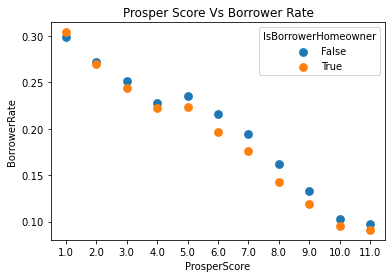

In [23]:
sb.pointplot(data = prosper, x = 'ProsperScore', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner', ci=None, linestyles = '')
plt.title('Prosper Score Vs Borrower Rate');

- Home ownership (collateral security) has no defined effect on the rate at which borrowers got their loans
- Borrowers with Lower ratings got Higher loan interest rates
- Theres a remarkable negative correlation between Borrower rate and Prosper score

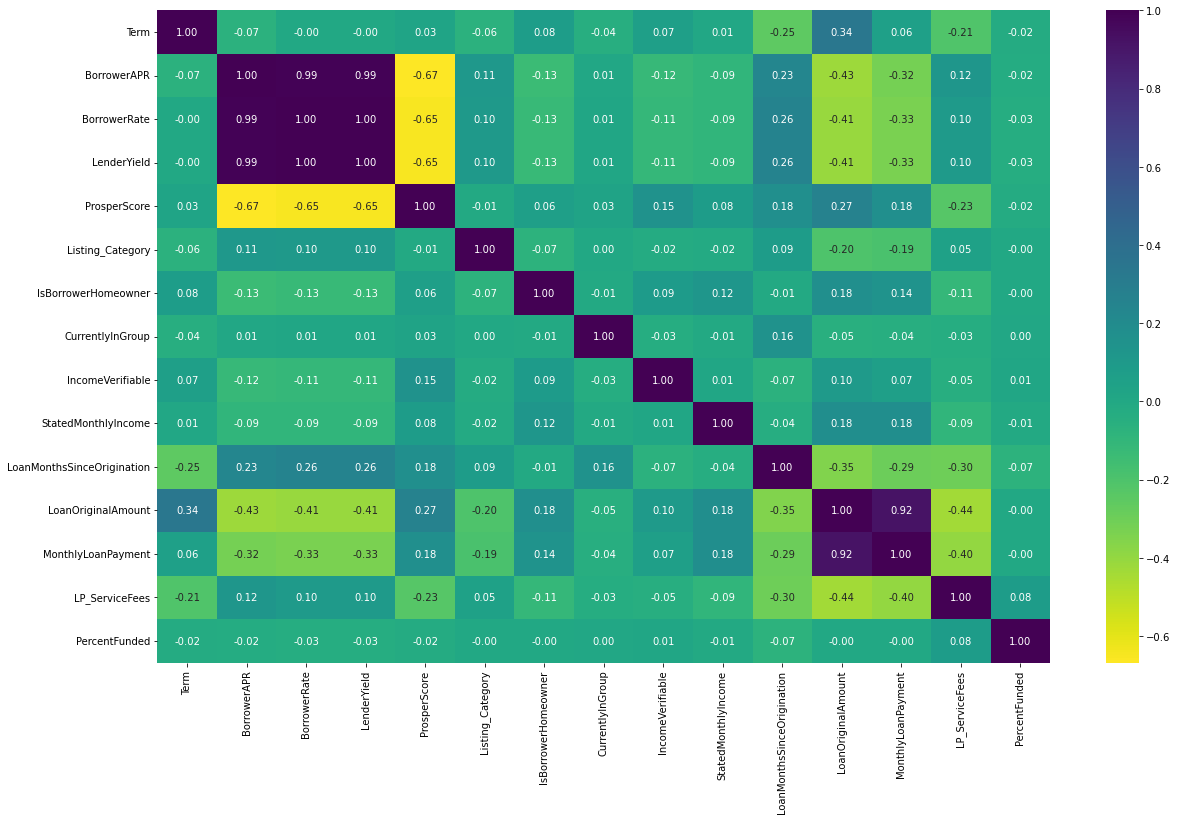

In [24]:
#correlation matrix
corrl = prosper1.corr()

#plotting the heat map
plt.figure(figsize = (20,12))
sb.heatmap(corrl,annot=True, cmap = 'viridis_r', fmt = '.2f');

- From the heatmap we can see that being a home owner is not strongly correlated with the rate the borrower got or the amount they could borrow
- Monthly Loan payment is strongly possitively correlated with the loan original amount which means that a borrower is likely to get a higher amount in loans if they will repay a higher amount monthly
- Prosper score is negatively correlated with the Borrower rate, Borrower APR or Lender Yield

## Conclusions
>The Return on loan investments (that is the Yield lenders get from giving out loans) represented by LenderYield is dependent on a number of factors:
- The BorrowerRate: That is the interest rate that the lender gives out the loan on. Ths is obvious as the primary source of the yield is on interest on the loan
- The Loan Original amount: From the above, we could see that big borrowers actually got lower interest rates and hence lower yield to lenders. Loan Original amount is negatively correlated to LenderYield
- Borroer APR: This is, just like Borrower rate, positively correlated to the Lender yield.
- Prosperscore: The higher the prosper score assigned to a borrower, the more confidence the lender has on them and hence, the lower the interest rate on the loan borrowed. This eventually translates to a lower Loan yield.


In [25]:
# Saving exploration dataset to csv
prosper.to_csv('prosper.csv', index=False)